In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('diabetes_binary_5050split_health_indicators_BRFSS2015.csv')
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

- Diabetes_binary: 0 = no diabetes 1 = prediabetes or diabetes
- HighBP: 0 = no high BP 1 = high BP (BP = Blood Pressure)
- HighChol: 0 = no high cholesterol 1 = high cholesterol
- CholCheck: 0 = no cholesterol check in 5 years 1 = yes cholesterol check in 5 years
- BMI: Body Mass Index
- Smoker: Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] 0 = no 1 = yes
- Stroke: (Ever told) you had a stroke. 0 = no 1 = yes
- HeartDiseaseorAttack: coronary heart disease (CHD) or myocardial infarction (MI) 0 = no 1 = yes
- PhysActivity: physical activity in past 30 days - not including job 0 = no 1 = yes
- Fruits: Consume Fruit 1 or more times per day 0 = no 1 = yes
- Veggies: Consume Vegetables 1 or more times per day 0 = no 1 = yes
- HvyAlcoholConsump: (adult men >=14 drinks per week and adult women>=7 drinks per week) 0 = no 1 = yes
- AnyHealthcare: Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc. 0 = no 1 = yes
- NoDocbcCost: Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? 0 = no 1 = yes
- GenHlth: Would you say that in general your health is: scale 1-5 1 = excellent 2 = very good 3 = good 4 = fair 5 = poor
- MentHlth: days of poor mental health scale 1-30 days
- PhysHlth: physical illness or injury days in past 30 days scale 1-30
- DiffWalk: Do you have serious difficulty walking or climbing stairs? 0 = no 1 = yes
- Sex: 0 = female 1 = male
- Age: 3-level age category: 'Age': {
            1: '18-24', 2: '25-29', 3: '30-34', 4: '35-39', 5: '40-44', 6: '45-49',
            7: '50-54', 8: '55-59', 9: '60-64', 10: '65-69', 11: '70-74', 12: '75-79',
            13: '80+'
        },
- Education: Education level 1 = Never attended school or only kindergarten 2 = elementary
- Income: Income scale 1-8

In [ ]:
df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,...,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,0.500000,0.563458,0.525703,0.975259,29.856985,0.475273,0.062171,0.147810,0.703036,0.611795,...,0.954960,0.093914,2.837082,3.752037,5.810417,0.252730,0.456997,8.584055,4.920953,5.698311
std,0.500004,0.495960,0.499342,0.155336,7.113954,0.499392,0.241468,0.354914,0.456924,0.487345,...,0.207394,0.291712,1.113565,8.155627,10.062261,0.434581,0.498151,2.852153,1.029081,2.175196
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,0.500000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [ ]:
correlations = df.corr()
correlations

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
Diabetes_binary,1.000000,0.381516,0.289213,0.115382,0.293373,0.085999,0.125427,0.211523,-0.158666,-0.054077,...,0.023191,0.040977,0.407612,0.087029,0.213081,0.272646,0.044413,0.278738,-0.170481,-0.224449
HighBP,0.381516,1.000000,0.316515,0.103283,0.241019,0.087438,0.129060,0.210750,-0.136102,-0.040852,...,0.035764,0.026517,0.320540,0.064294,0.173922,0.234784,0.040819,0.338132,-0.141643,-0.187657
HighChol,0.289213,0.316515,1.000000,0.085981,0.131309,0.093398,0.099786,0.181187,-0.090453,-0.047384,...,0.031532,0.033199,0.237778,0.083881,0.142610,0.162043,0.017324,0.240338,-0.084386,-0.107777
CholCheck,0.115382,0.103283,0.085981,1.000000,0.045648,-0.004331,0.022529,0.043497,-0.008249,0.017384,...,0.106800,-0.062669,0.059213,-0.010660,0.034540,0.044430,-0.007991,0.101743,-0.008695,0.007550
BMI,0.293373,0.241019,0.131309,0.045648,1.000000,0.011551,0.022931,0.060355,-0.170936,-0.084505,...,-0.013417,0.065832,0.267888,0.104682,0.161862,0.246094,0.000827,-0.038648,-0.100233,-0.124878
Smoker,0.085999,0.087438,0.093398,-0.004331,0.011551,1.000000,0.064658,0.124418,-0.079823,-0.074811,...,-0.012939,0.035799,0.152416,0.091257,0.120698,0.119789,0.112125,0.105424,-0.140966,-0.104725
Stroke,0.125427,0.129060,0.099786,0.022529,0.022931,0.064658,1.000000,0.223394,-0.079985,-0.008996,...,0.006484,0.036198,0.189447,0.087303,0.164488,0.192266,0.003822,0.123879,-0.073926,-0.136577
HeartDiseaseorAttack,0.211523,0.210750,0.181187,0.043497,0.060355,0.124418,0.223394,1.000000,-0.098223,-0.019436,...,0.015687,0.036029,0.275868,0.075057,0.198416,0.232611,0.098161,0.221878,-0.096559,-0.146748
PhysActivity,-0.158666,-0.136102,-0.090453,-0.008249,-0.170936,-0.079823,-0.079985,-0.098223,1.000000,0.133813,...,0.027089,-0.063302,-0.273548,-0.130090,-0.234500,-0.276868,0.051753,-0.100753,0.190271,0.196551
Fruits,-0.054077,-0.040852,-0.047384,0.017384,-0.084505,-0.074811,-0.008996,-0.019436,0.133813,1.000000,...,0.029385,-0.045843,-0.098687,-0.062102,-0.048572,-0.050784,-0.088723,0.061096,0.098715,0.079009


<Axes: >

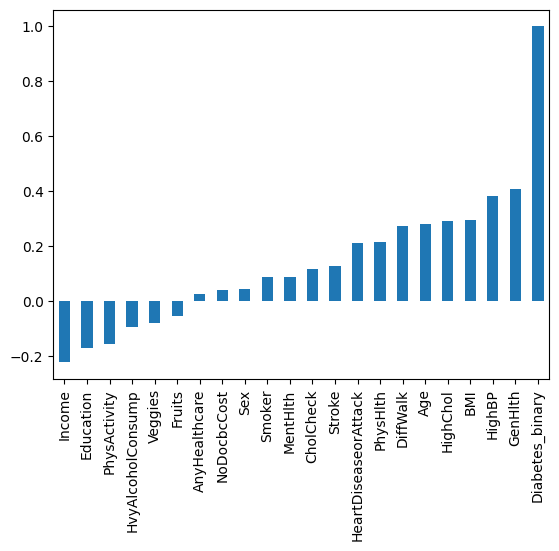

In [ ]:
correlations['Diabetes_binary'].sort_values().plot(kind='bar')

In [ ]:
df.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

In [ ]:
#Checking for duplicated
df.duplicated().sum()

1635

In [ ]:
#Drop duplicate rows
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

In [ ]:
#Change dtype to int
df = df.astype('int32')
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,0,1,26,0,0,0,1,0,...,1,0,3,5,30,0,1,4,6,8
1,0,1,1,1,26,1,1,0,0,1,...,1,0,3,0,0,0,1,12,6,8
2,0,0,0,1,26,0,0,0,1,1,...,1,0,1,0,10,0,1,13,6,8
3,0,1,1,1,28,1,0,0,1,1,...,1,0,3,0,3,0,1,11,6,8
4,0,0,0,1,29,1,0,0,1,1,...,1,0,2,0,0,0,0,8,5,8


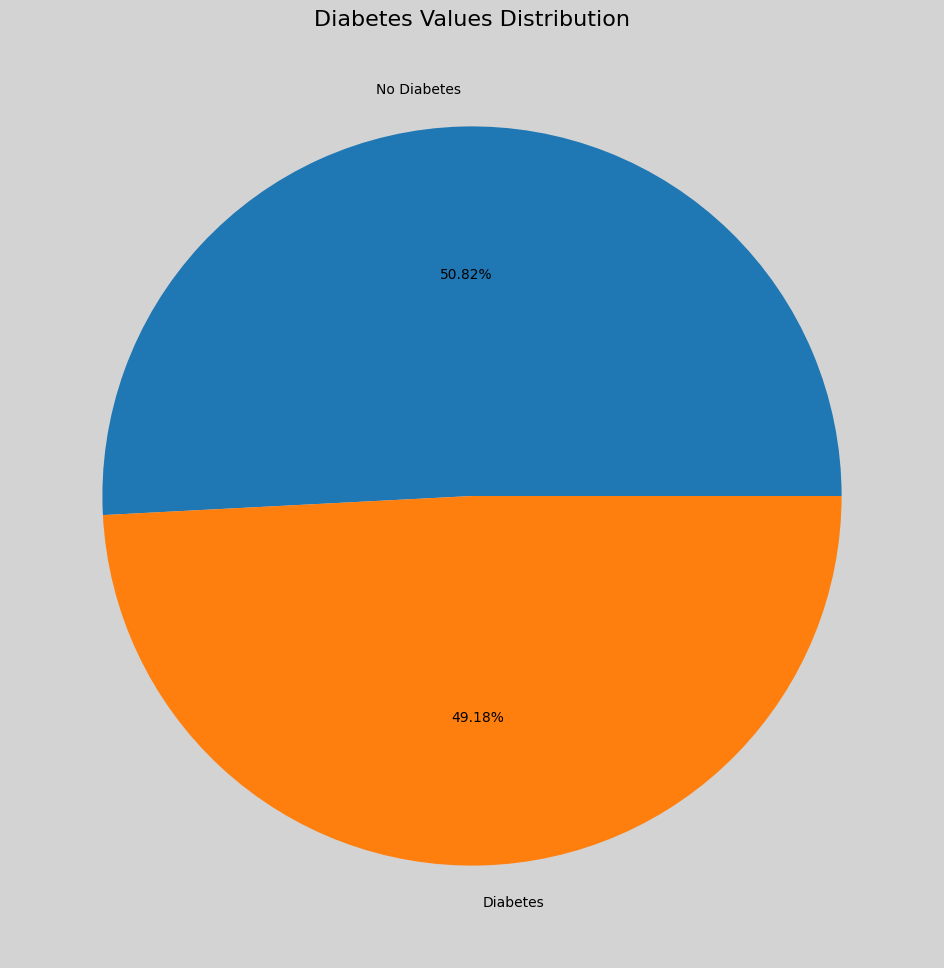

In [ ]:
#Plot pie chart to show HeartDisease Percentage
plt.figure(figsize=(20,12), facecolor='lightgray')
plt.pie(df['Diabetes_binary'].value_counts(), labels=['No Diabetes', 'Diabetes'], autopct='%1.2f%%')
plt.title('Diabetes Values Distribution', fontsize = 16)
plt.show()

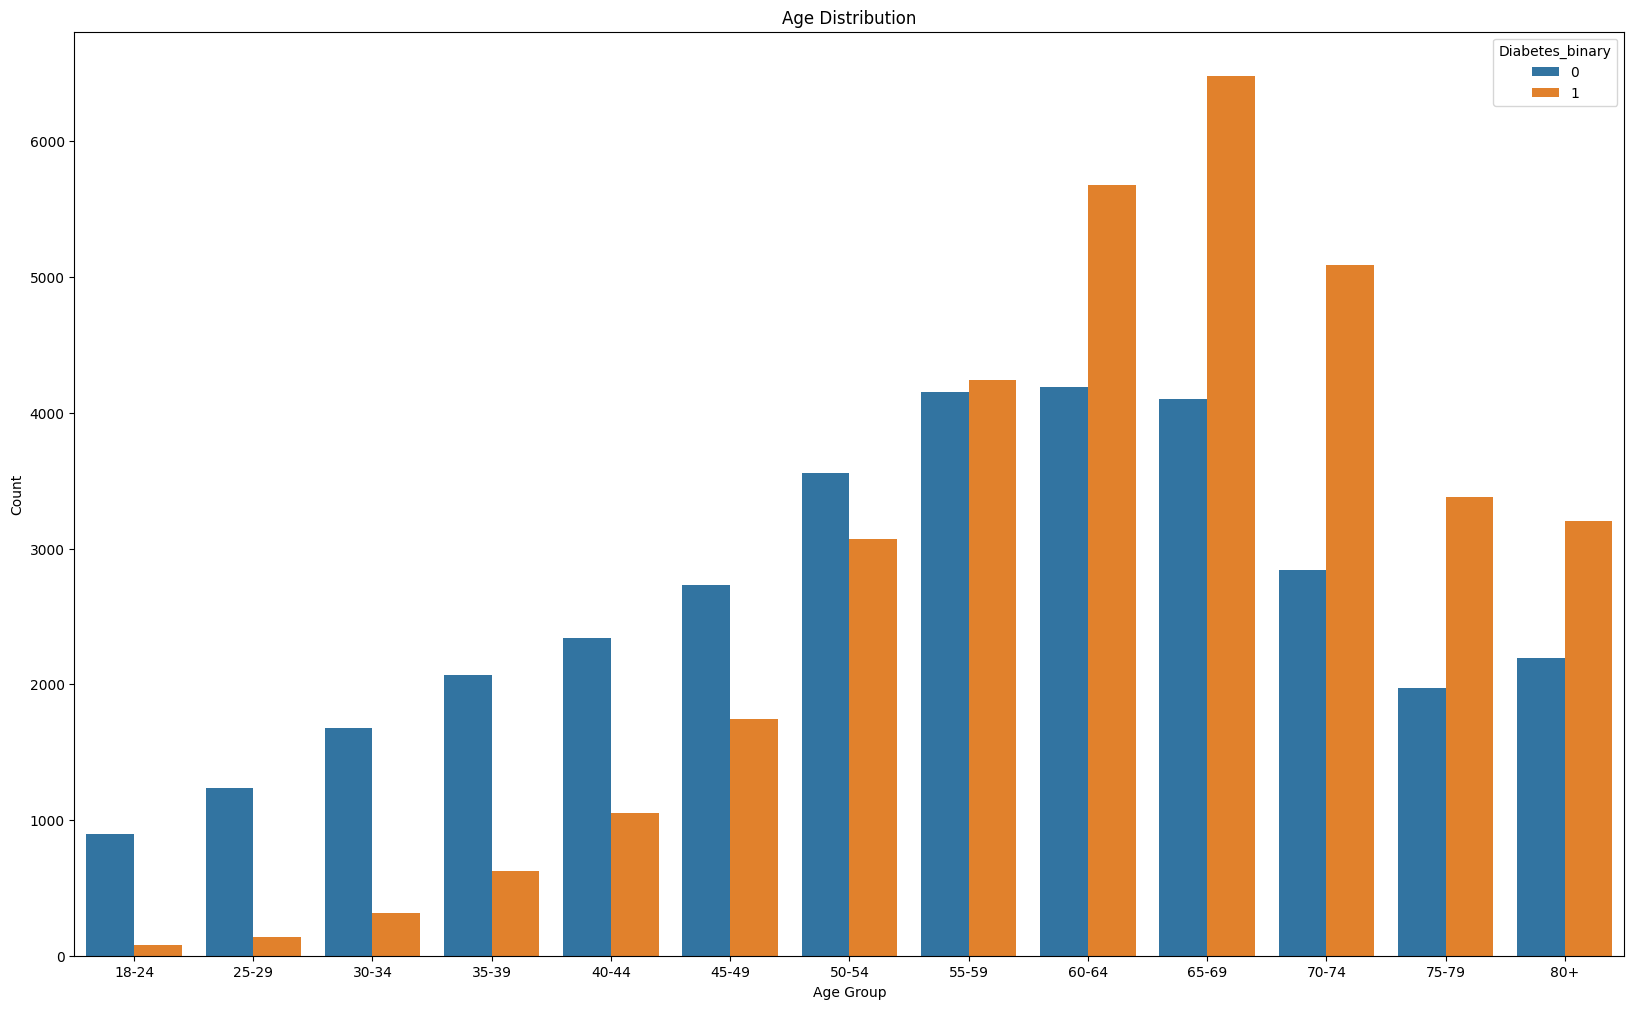

In [ ]:
# Age Vs Diabetes distribution
plt.figure(figsize=(20,12))
sns.countplot(x='Age', data=df, hue='Diabetes_binary')
plt.title('Age Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], labels=['18-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80+'])
plt.show()

In [ ]:
diabetic_people = df[df["Diabetes_binary"] == 1]

In [ ]:
diabetic_people

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
35346,1,1,1,1,30,1,0,1,0,1,...,1,0,5,30,30,1,0,9,5,1
35347,1,0,0,1,25,1,0,0,1,1,...,1,0,3,0,0,0,1,13,6,8
35348,1,1,1,1,28,0,0,0,0,0,...,1,0,4,0,0,1,0,11,4,6
35349,1,0,0,1,23,1,0,0,1,0,...,1,0,2,0,0,0,1,7,5,6
35350,1,1,0,1,27,0,0,0,1,1,...,1,0,1,0,0,0,0,13,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,1,0,1,1,37,0,0,0,0,0,...,1,0,4,0,0,0,0,6,4,1
70688,1,0,1,1,29,1,0,1,0,1,...,1,0,2,0,0,1,1,10,3,6
70689,1,1,1,1,25,0,0,1,0,1,...,1,0,5,15,0,1,0,13,6,4
70690,1,1,1,1,18,0,0,0,0,0,...,1,0,4,0,0,1,0,11,2,4


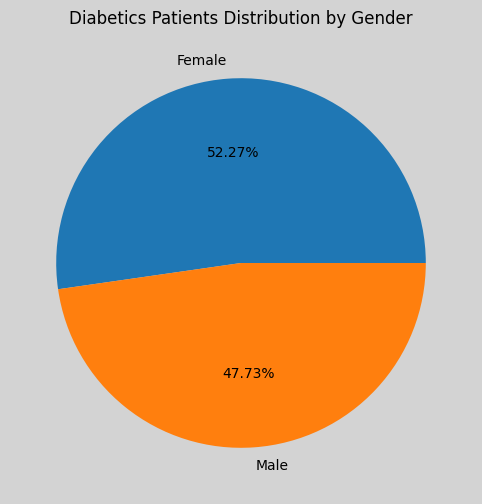

In [ ]:
# Plot pie chart to show sex distribution of Diabetes patients
plt.figure(figsize=(10,6), facecolor='lightgray')
plt.pie(diabetic_people['Sex'].value_counts(), labels=['Female','Male'] , autopct='%1.2f%%')
plt.title('Diabetics Patients Distribution by Gender')
plt.show()

Text(0.5, 1.0, 'High Cholesterol with Respect to only Diabetic Patients')

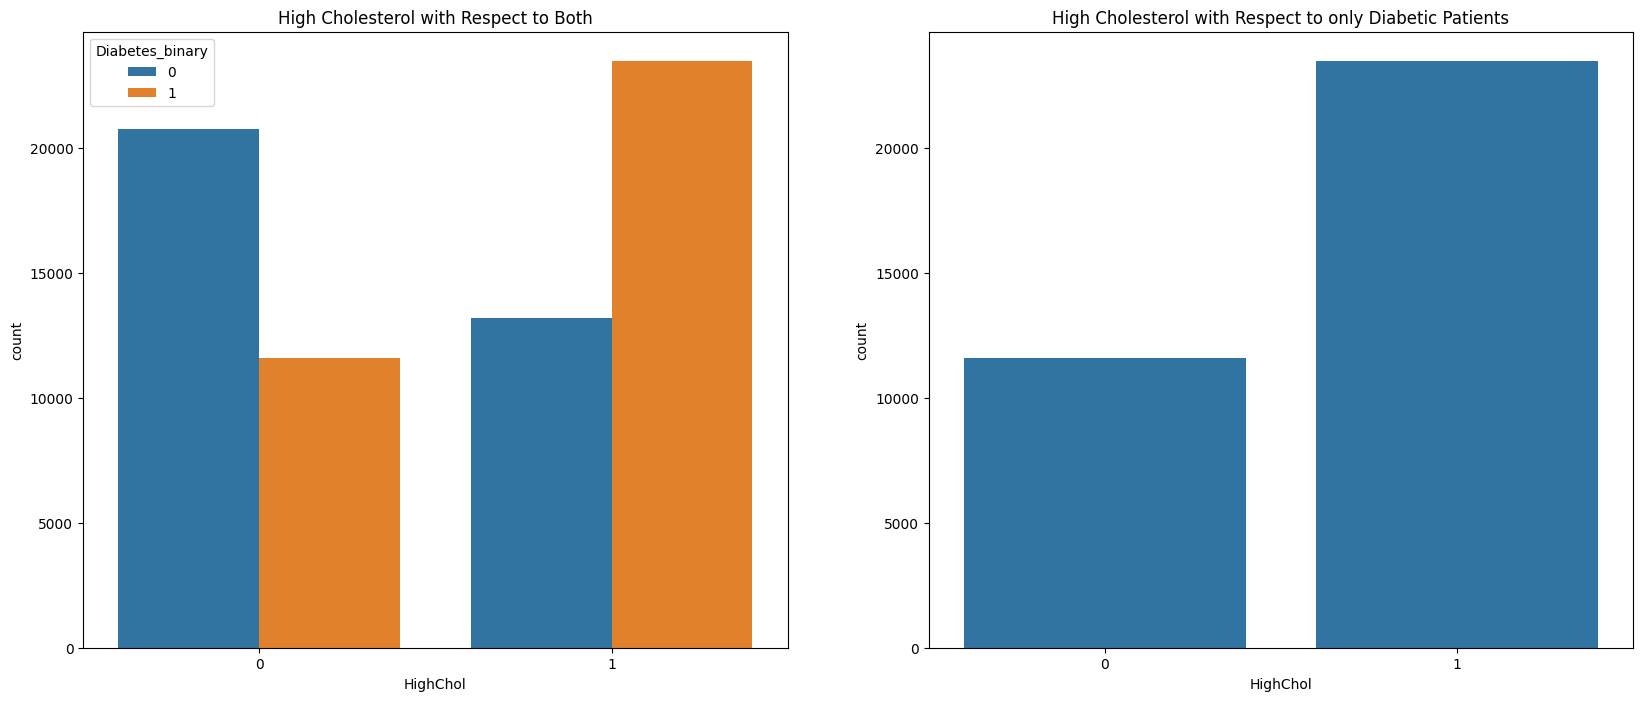

In [ ]:
# HighChol and Diabetes
fig,ax = plt.subplots(1, 2, figsize=(20,8))
sns.countplot(x='HighChol', data=df, hue='Diabetes_binary', ax=ax[0]).set_title('High Cholesterol with Respect to Both')
sns.countplot(x='HighChol', data= diabetic_people, ax=ax[1]).set_title('High Cholesterol with Respect to only Diabetic Patients')

Text(0.5, 1.0, 'Difficulty in Walking with Respect to only Diabetic Patients')

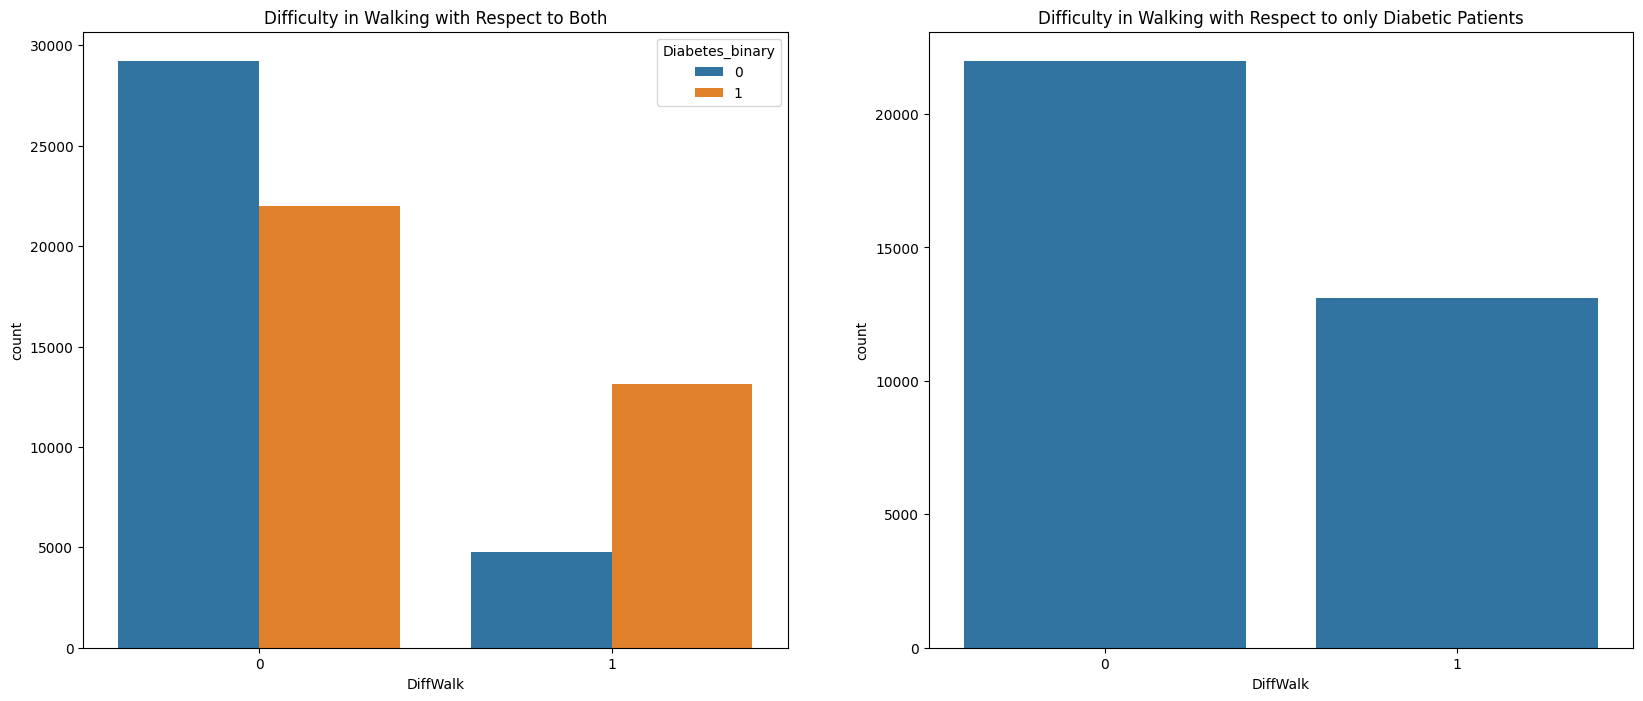

In [ ]:
# DiffWalk and Diabetes
fig,ax = plt.subplots(1, 2, figsize=(20,8))
sns.countplot(x='DiffWalk', data=df, hue='Diabetes_binary', ax=ax[0]).set_title('Difficulty in Walking with Respect to Both')
sns.countplot(x='DiffWalk', data= diabetic_people, ax=ax[1]).set_title('Difficulty in Walking with Respect to only Diabetic Patients')

Text(0.5, 1.0, 'HighBP with Respect to only Diabetic Patients')

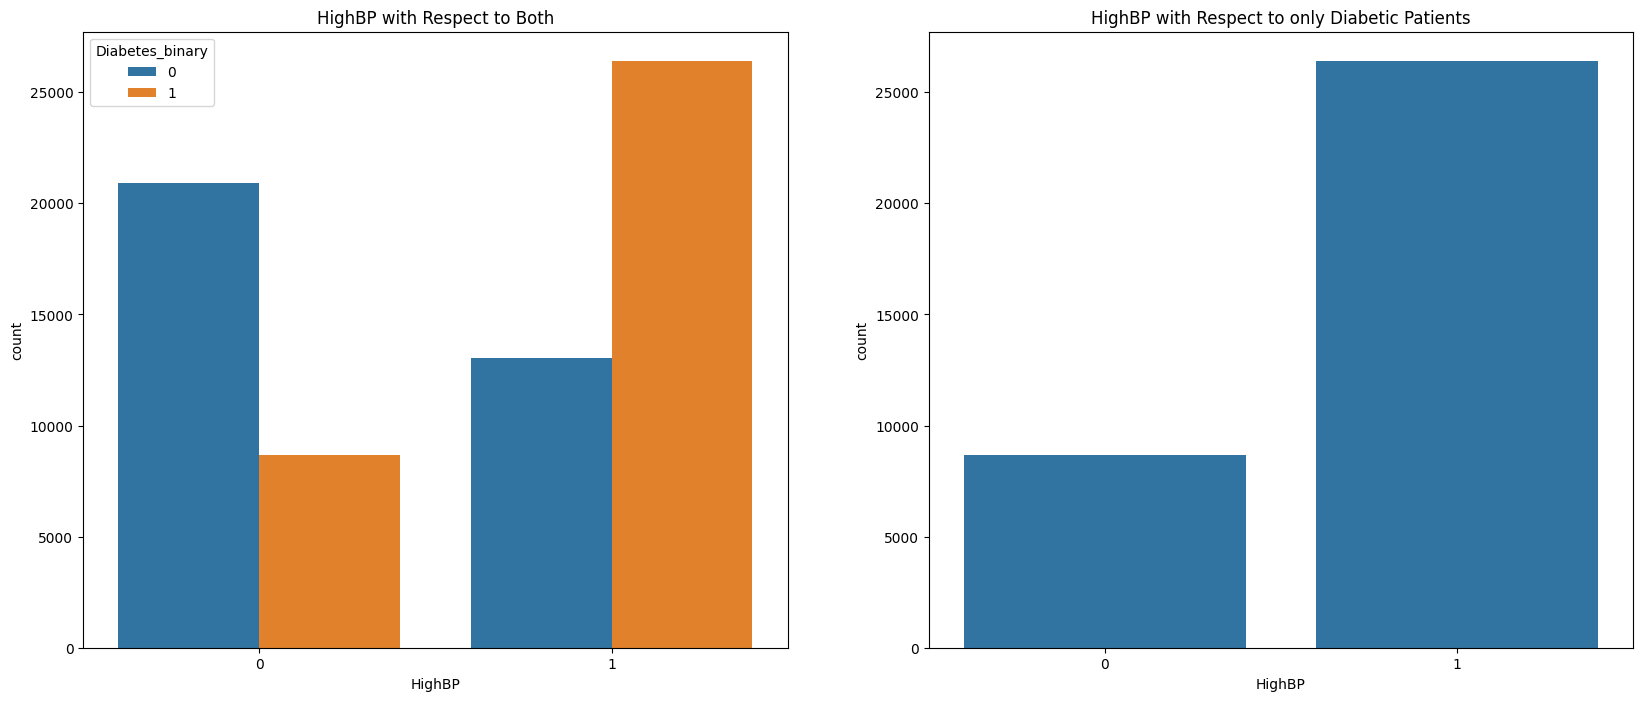

In [ ]:
# DiffWalk and Diabetes
fig,ax = plt.subplots(1, 2, figsize=(20,8))
sns.countplot(x='HighBP', data=df, hue='Diabetes_binary', ax=ax[0]).set_title('HighBP with Respect to Both')
sns.countplot(x='HighBP', data= diabetic_people, ax=ax[1]).set_title('HighBP with Respect to only Diabetic Patients')

Text(0.5, 1.0, 'GenHlth with Respect to only Diabetic Patients')

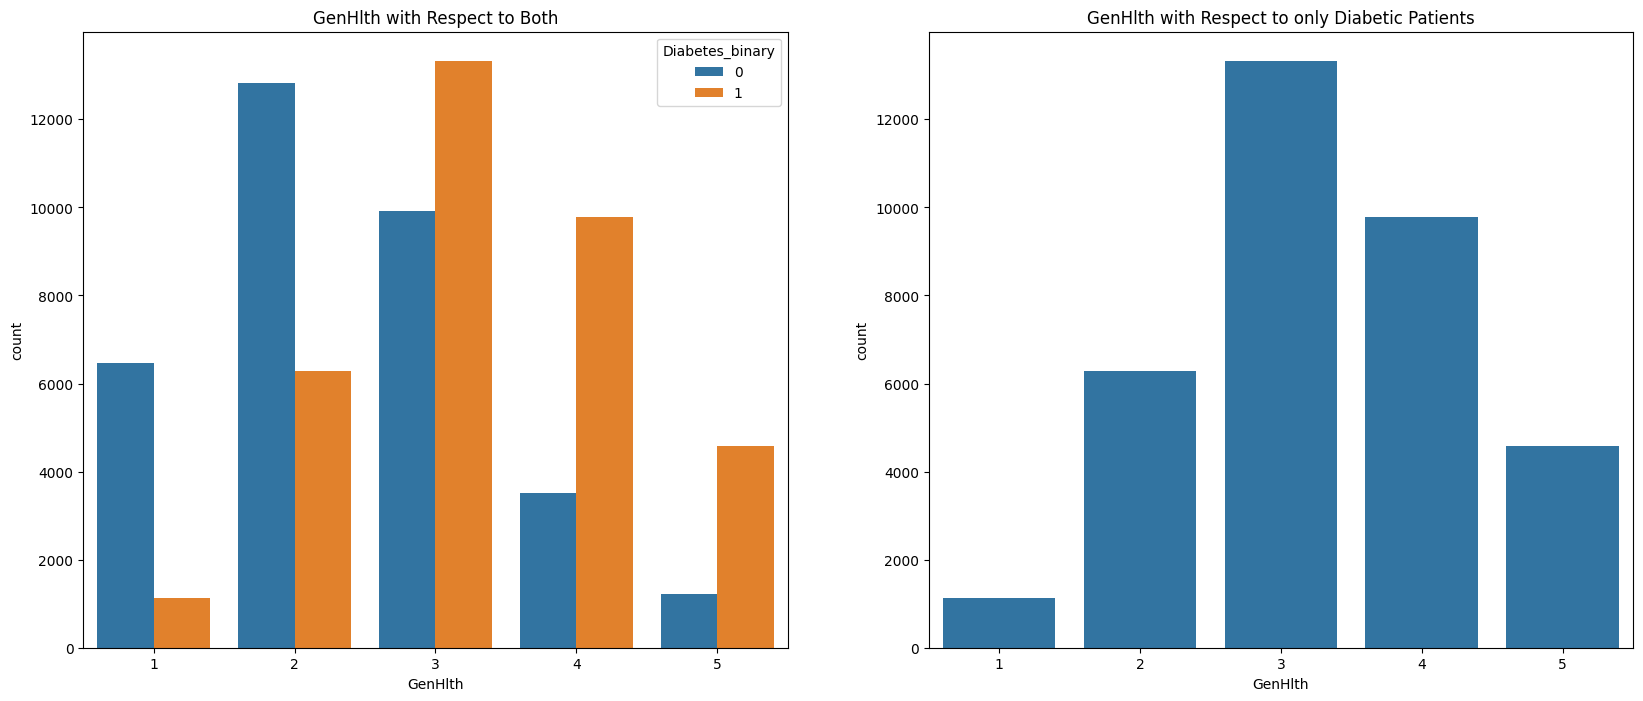

In [ ]:
# DiffWalk and Diabetes
fig,ax = plt.subplots(1, 2, figsize=(20,8))
sns.countplot(x='GenHlth', data=df, hue='Diabetes_binary', ax=ax[0]).set_title('GenHlth with Respect to Both')
sns.countplot(x='GenHlth', data= diabetic_people, ax=ax[1]).set_title('GenHlth with Respect to only Diabetic Patients')

<Axes: xlabel='BMI', ylabel='Count'>

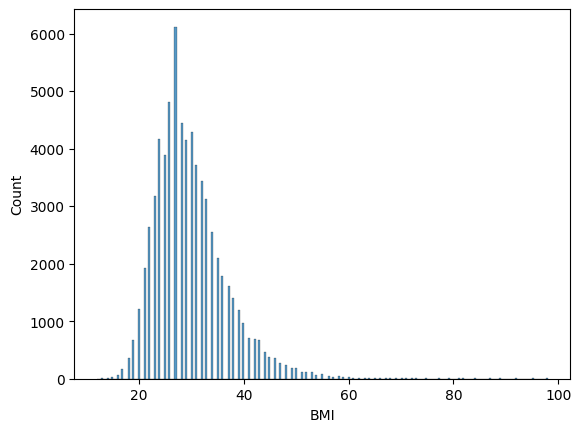

In [ ]:
sns.histplot(x=df['BMI'])

#### Model Building

##### Train_Test_Validation Split

In [ ]:
X = df.drop(columns="Diabetes_binary")
y = df["Diabetes_binary"]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, shuffle=True, stratify = y, random_state=42)

# check shapes of split
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(62151, 21)
(6906, 21)
(62151,)
(6906,)


In [ ]:
X_train_train, X_train_validation, y_train_train, y_train_validation = train_test_split(X_train, y_train, test_size=0.1, stratify = y_train, shuffle=True, random_state=42)

# check shapes of split
print(X_train_train.shape)
print(X_train_validation.shape)
print(y_train_train.shape)
print(y_train_validation.shape)

(55935, 21)
(6216, 21)
(55935,)
(6216,)


In [ ]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train_train, y_train_train)

# track the accuracy scores on training set and validation set
print(f'Training set accuracy score: {dummy_clf.score(X_train_train, y_train_train) }')
print(f'Validation set accuracy score: {dummy_clf.score(X_train_validation, y_train_validation) }')

# Performance on training set
print(classification_report(y_train_train, dummy_clf.predict(X_train_train), zero_division=0))

Training set accuracy score: 0.5082327701796728
Validation set accuracy score: 0.5082046332046332
              precision    recall  f1-score   support

           0       0.00      0.00      0.00     27507
           1       0.51      1.00      0.67     28428

    accuracy                           0.51     55935
   macro avg       0.25      0.50      0.34     55935
weighted avg       0.26      0.51      0.34     55935



In [ ]:
# Performance on validation set
print(classification_report(y_train_validation, dummy_clf.predict(X_train_validation), zero_division=0))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3057
           1       0.51      1.00      0.67      3159

    accuracy                           0.51      6216
   macro avg       0.25      0.50      0.34      6216
weighted avg       0.26      0.51      0.34      6216



#### Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# define and fit
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train_train, y_train_train)

# track the accuracy scores on training set and validation set
print(f'Training set accuracy score: {decision_tree.score(X_train_train, y_train_train) }')
print(f'Validation set accuracy score: {decision_tree.score(X_train_validation, y_train_validation) }')

Training set accuracy score: 0.9952266023062484
Validation set accuracy score: 0.6505791505791506


#### Overfitting
The result shows overfitting that the accuracy score on training set is 99% but that on validation set is much lower, 64%.

In [ ]:
print(classification_report(y_train_train, decision_tree.predict(X_train_train)))
print("__________________________________________________________________________")
print(classification_report(y_train_validation, decision_tree.predict(X_train_validation)))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     27507
           1       1.00      0.99      1.00     28428

    accuracy                           1.00     55935
   macro avg       1.00      1.00      1.00     55935
weighted avg       1.00      1.00      1.00     55935

__________________________________________________________________________
              precision    recall  f1-score   support

           0       0.64      0.65      0.64      3057
           1       0.66      0.66      0.66      3159

    accuracy                           0.65      6216
   macro avg       0.65      0.65      0.65      6216
weighted avg       0.65      0.65      0.65      6216



In [ ]:
from sklearn.preprocessing import MinMaxScaler

X_scaler = MinMaxScaler()
X_train_train = X_scaler.fit_transform(X_train_train)
X_train_validation = X_scaler.transform(X_train_validation)

In [ ]:
# Function to plot the results in further sections

def plot_score(title, x_label):
    # Gather the results of different metrics on the classifier performance
    # Define the name of each metric on the figures
    training_scores = [train_acc_score, train_f1_score, train_precision_score, train_recall_score]
    validation_scores = [validation_acc_score, validation_f1_score, validation_precision_score, validation_recall_score]
    label_name = ['accuracy score', 'f1 score', 'precision score', 'recall score']

    # subplots
    fig, ax = plt.subplots(1, 4, figsize=(40, 10))
    axe = ax.ravel()

    # loop through the lists and plot the 3 figures with corresponding data
    for i, scores in enumerate(zip(training_scores, validation_scores)):

        axe[i].plot(list_parameters, scores[0], c='blue')
        axe[i].plot(list_parameters, scores[1], c='red')
        axe[i].set_title('Influence of ' + title + ' on ' + label_name[i])
        axe[i].set_xlabel(x_label)
        axe[i].set_ylabel(label_name[i])

#### Decision Tree Classifier - Effect of maximum depth

In [ ]:
# Define the hyperparameters for the experiment (Maximum depth of the decision tree)
list_parameters = [*range(1, 30)]

# Create Empty List for result storage
train_acc_score, validation_acc_score = [], []
train_f1_score, validation_f1_score = [], []
train_precision_score, validation_precision_score = [], []
train_recall_score, validation_recall_score = [], []

# Fit in different value of maximum tree depth
for n in list_parameters:

    # define classifier and fit training set
    clf = DecisionTreeClassifier(max_depth=n)
    clf.fit(X_train_train, y_train_train)

    # predict classes on training and validation sets
    y_pred_train_train = clf.predict(X_train_train)
    y_pred_train_validation = clf.predict(X_train_validation)

    # store results of  metrics on corresponding lists
    train_acc_score.append(accuracy_score(y_train_train, y_pred_train_train))
    validation_acc_score.append(accuracy_score(y_train_validation, y_pred_train_validation))
    train_f1_score.append(f1_score(y_train_train, y_pred_train_train))
    validation_f1_score.append(f1_score(y_train_validation, y_pred_train_validation))
    train_precision_score.append(precision_score(y_train_train, y_pred_train_train))
    validation_precision_score.append(precision_score(y_train_validation, y_pred_train_validation))
    train_recall_score.append(recall_score(y_train_train, y_pred_train_train))
    validation_recall_score.append(recall_score(y_train_validation, y_pred_train_validation))

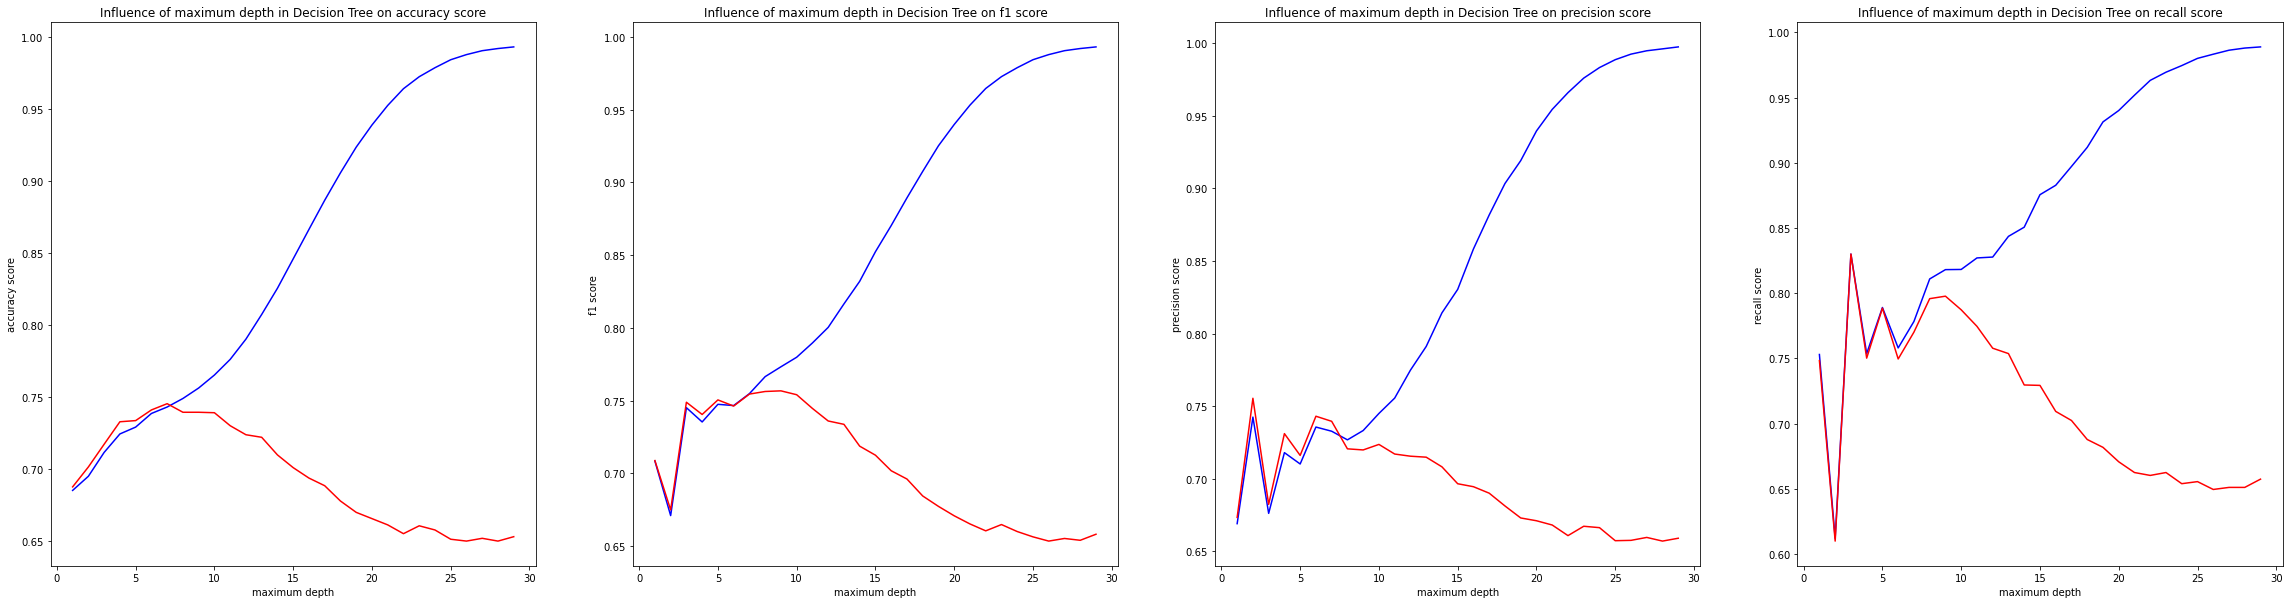

In [ ]:
plot_score("maximum depth in Decision Tree", 'maximum depth')

For maximum depth from 1 to around 8, the performance of the model is not stable. But both training and validation set in metrics move in the same direction.
Accuracy scores for both training and validation sets increase
F1 score drop from slightly above 71% to 65%, when maximum depth from 0 to 1, then increase. Recall score is fluctuate, which drops and raise and drop and raise.

However, for maximum depth from 8 to 30, the training scores and validation scores on all metrics move in the different direction.
And the differences increase when the maximum depth increases. The performance is relatively stable after maximum depth reaches 27.

It is clear that overfitting begins at around maximum depth equals to around 8 to 9.

#### Decision Tree Classifier - Effect of Cost Complexity Pruning Parameter

In [ ]:
# Define the hyperparameters for the experiment (Cost-Complexity Pruning Parameter of the decision tree)
list_parameters = [x/1000 for x in range(0, 15)]

# Create Empty List for result storage
train_acc_score, validation_acc_score = [], []
train_f1_score, validation_f1_score = [], []
train_precision_score, validation_precision_score = [], []
train_recall_score, validation_recall_score = [], []

# Fit in different value of maximum tree depth
for n in list_parameters:

    # define classifier and fit training set
    clf = DecisionTreeClassifier(ccp_alpha=n)
    clf.fit(X_train_train, y_train_train)

    # predict classes on training and validation sets
    y_pred_train_train = clf.predict(X_train_train)
    y_pred_train_validation = clf.predict(X_train_validation)

    # store results of  metrics on corresponding lists
    train_acc_score.append(accuracy_score(y_train_train, y_pred_train_train))
    validation_acc_score.append(accuracy_score(y_train_validation, y_pred_train_validation))
    train_f1_score.append(f1_score(y_train_train, y_pred_train_train))
    validation_f1_score.append(f1_score(y_train_validation, y_pred_train_validation))
    train_precision_score.append(precision_score(y_train_train, y_pred_train_train))
    validation_precision_score.append(precision_score(y_train_validation, y_pred_train_validation))
    train_recall_score.append(recall_score(y_train_train, y_pred_train_train))
    validation_recall_score.append(recall_score(y_train_validation, y_pred_train_validation))

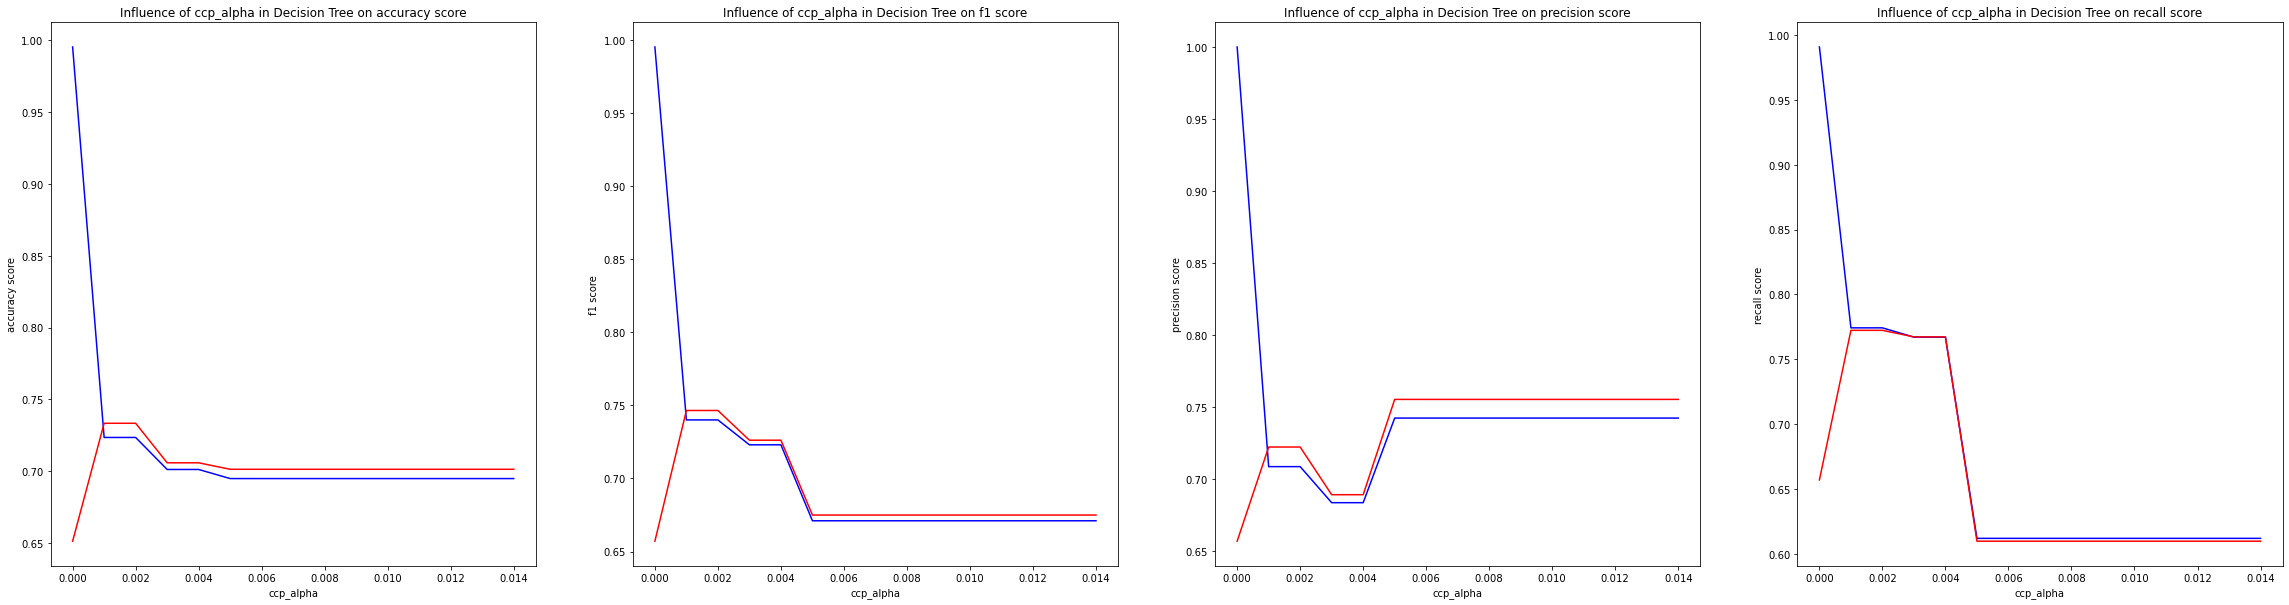

In [ ]:
plot_score("ccp_alpha in Decision Tree", 'ccp_alpha')

Cost-complexity pruning score minimixe the difference between the training and validation scores in all three metrics as ccp_alpha increases from 0 to 0.001.

By controlling the maximum depth, smaller value leads to less overfitting. In the example above, 8 would be a reasonable value to deal with overfitting.
"ccp_alpha" even more efficiently handles the overfitting problem. In this case, with ccp_alpha value around 0.002, problem of overfitting is completely eliminated.



#### KNN
##### KNN - Effect of number of nearest neighbour

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Define the hyperparameters for the experiment (number of nearest neighbour of the KNN)
list_parameters = [*range(1, 30)]

# Create Empty List for result storage
train_acc_score, validation_acc_score = [], []
train_f1_score, validation_f1_score = [], []
train_precision_score, validation_precision_score = [], []
train_recall_score, validation_recall_score = [], []

# Fit in different value of maximum tree depth
for n in list_parameters:

    # Initialize the KNN classifier with k=5 (default)
    knn = KNeighborsClassifier(n_neighbors=n)
    # Train the classifier
    knn.fit(X_train_train, y_train_train)

    # predict classes on training and validation sets
    y_pred_train_train = knn.predict(X_train_train)
    y_pred_train_validation = knn.predict(X_train_validation)

    # store results of  metrics on corresponding lists
    train_acc_score.append(accuracy_score(y_train_train, y_pred_train_train))
    validation_acc_score.append(accuracy_score(y_train_validation, y_pred_train_validation))
    train_f1_score.append(f1_score(y_train_train, y_pred_train_train))
    validation_f1_score.append(f1_score(y_train_validation, y_pred_train_validation))
    train_precision_score.append(precision_score(y_train_train, y_pred_train_train))
    validation_precision_score.append(precision_score(y_train_validation, y_pred_train_validation))
    train_recall_score.append(recall_score(y_train_train, y_pred_train_train))
    validation_recall_score.append(recall_score(y_train_validation, y_pred_train_validation))

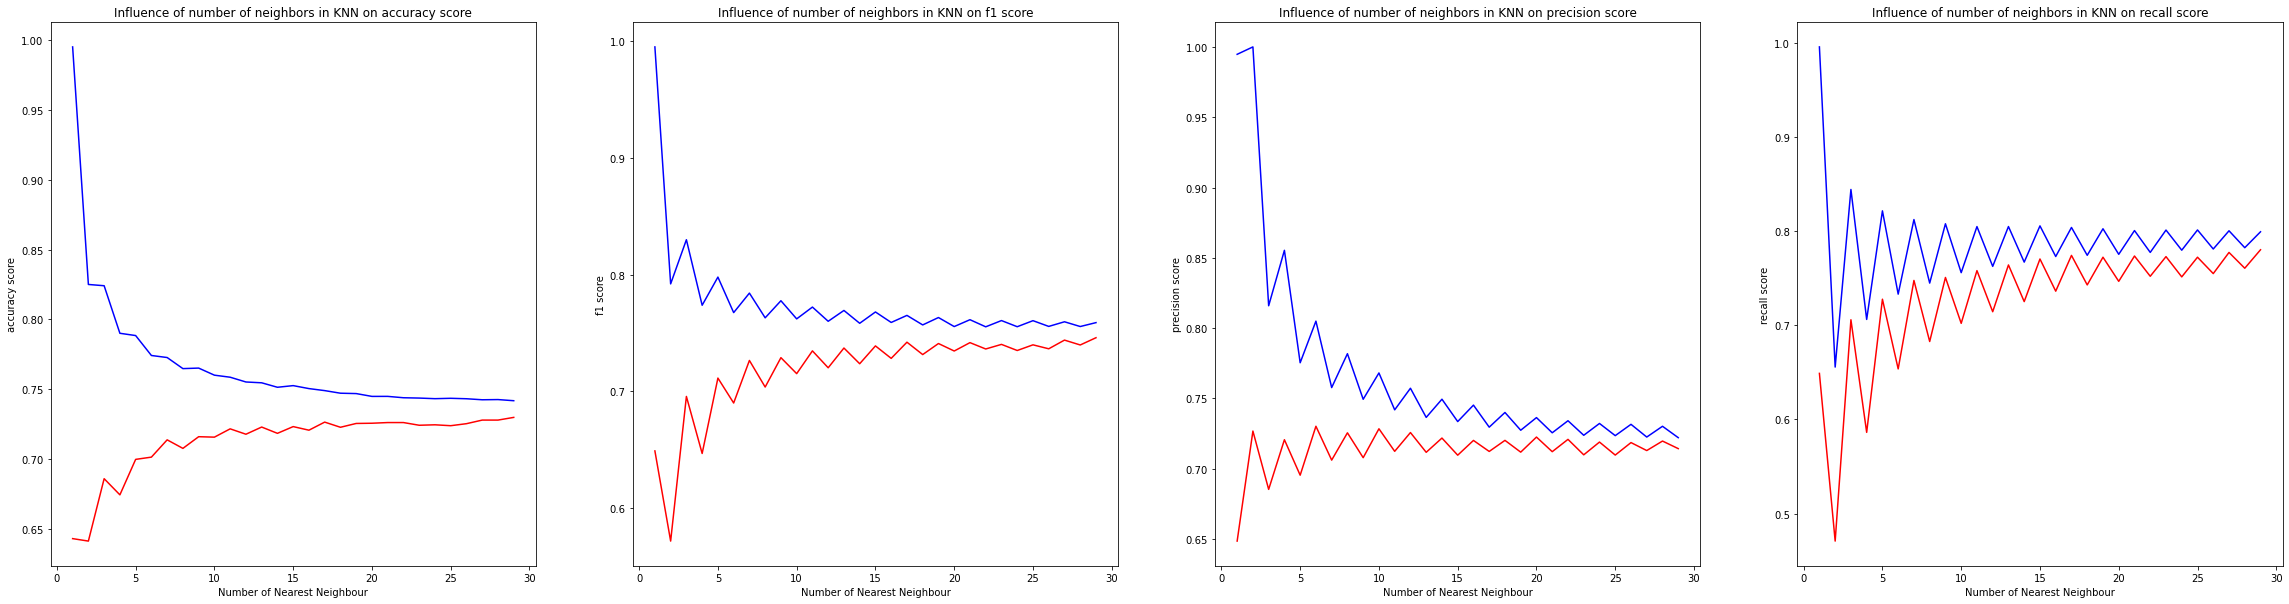

In [ ]:
plot_score("number of neighbors in KNN", "Number of Nearest Neighbour")

The performance of KNN is similar to that of decision tree. The best validation accuracy score in these two models are slightly above 70%.
Yet, the recall score has never reached over 80% as in decision tree.

Overall in all metrics, both training and validation scores move towards the same direction but, due to the different magnitude, overfitting is handled.
Differeence between training and validation scores decrease, when number of nearest neighbour increase.

#### Support Vector Machine
##### SVM - Effect of C

In [ ]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [40]:
# # Define the hyperparameters for the experiment (number of nearest neighbour of the KNN)
list_parameters = [*range(1, 10)]

# Create Empty List for result storage
train_acc_score, validation_acc_score = [], []
train_f1_score, validation_f1_score = [], []
train_precision_score, validation_precision_score = [], []
train_recall_score, validation_recall_score = [], []

# Fit in different value of maximum tree depth
for n in list_parameters:

    # Initialize the SVM classifier
    svm_classifier = SVC(C=n)

    # Train the classifier
    svm_classifier.fit(X_train_train, y_train_train)

    # predict classes on training and validation sets
    y_pred_train_train = svm_classifier.predict(X_train_train)
    y_pred_train_validation = svm_classifier.predict(X_train_validation)

    # store results of  metrics on corresponding lists
    train_acc_score.append(accuracy_score(y_train_train, y_pred_train_train))
    validation_acc_score.append(accuracy_score(y_train_validation, y_pred_train_validation))
    train_f1_score.append(f1_score(y_train_train, y_pred_train_train))
    validation_f1_score.append(f1_score(y_train_validation, y_pred_train_validation))
    train_precision_score.append(precision_score(y_train_train, y_pred_train_train))
    validation_precision_score.append(precision_score(y_train_validation, y_pred_train_validation))
    train_recall_score.append(recall_score(y_train_train, y_pred_train_train))
    validation_recall_score.append(recall_score(y_train_validation, y_pred_train_validation))

In [ ]:
plot_score("C in Support Vector Machine", "C")

In [ ]:
# Parameter grid for random forest classifier
para_rfc = dict(
    estimator__n_estimators=[100, 200, 300, 400, 500],
    estimator__criterion=['gini', 'entropy', 'log_loss'],
    estimator__max_depth=[*range(1, 20, 2)],
    estimator__min_samples_split=[*range(2, 20, 2)],
    estimator__min_samples_leaf=[*range(1, 20, 2)],
    estimator__max_features=['auto', 'sqrt', 'log2'],
    estimator__bootstrap=[True, False],
    estimator__oob_score=[True, False],
    estimator__ccp_alpha=[a/1000 for a in [*range(0, 15)]]
)

# Parameter grid for gradient boosting
para_gbc = dict(
    estimator__loss=['deviance', 'exponential'],
    estimator__learning_rate=[0.01, 0.1, 0.2, 0.3],
    estimator__n_estimators=[100, 200, 300],
    estimator__criterion=['friedman_mse', 'mse', 'mae'],
    estimator__max_depth=[*range(1, 10)],
    estimator__min_samples_split=[*range(2, 20, 2)],
    estimator__min_samples_leaf=[*range(1, 20, 2)],
    estimator__subsample=[0.7, 0.8, 0.9, 1.0],
    estimator__max_features=['auto', 'sqrt', 'log2']
)

# Parameter grid for ADABoost
para_abc = dict(
    estimator__n_estimators=[50, 100, 150, 200],
    estimator__learning_rate=[0.01, 0.1, 0.2, 0.3, 1.0],
    estimator__algorithm=['SAMME', 'SAMME.R']
)


# Parameter grid for XGBoost
para_xgb = dict(
    estimator__booster=['gbtree', 'gblinear', 'dart'],
    estimator__learning_rate=[0.01, 0.1, 0.2, 0.3],
    estimator__n_estimators=[100, 200, 300],
    estimator__max_depth=[*range(1, 20, 2)],
    estimator__min_child_weight=[1, 2, 3, 4],
    estimator__gamma=[0, 0.1, 0.2, 0.3, 0.4],
    estimator__subsample=[0.7, 0.8, 0.9, 1.0],
    estimator__colsample_bytree=[0.7, 0.8, 0.9, 1.0],
    estimator__reg_alpha=[0, 0.01, 0.1, 1],
    estimator__reg_lambda=[1, 1.5, 2, 3]
)

# parameter grids for decision tree
para_dtc = dict(
    estimator__criterion=['gini', 'entropy', 'log_loss'],
    estimator__splitter=['best', 'random'],
    estimator__max_depth=[*range(1, 10)],
    estimator__min_samples_split=[*range(10, 20, 10)],
    estimator__min_samples_leaf=[*range(10, 20, 10)],
    estimator__ccp_alpha=[a/1000 for a in [*range(0, 15)]]
)

# parameter grids for KNN
para_knc = dict(
    estimator__n_neighbors=[*range(1,15)],
    estimator__weights=['uniform', 'distance'],
    estimator__p=[*range(1, 4)]
)

# parameter grids for SVM with "rbf" kernel
para_svc_rbf = dict(
    estimator__kernel=['rbf'],
    estimator__gamma=['scale', 'auto'],
    estimator__C = [1, 2, 3, 4, 5]
)

# parameter grids for SVM with "poly" kernel
para_svc_poly = dict(
    estimator__kernel=['poly'],
    estimator__degree=[*range(1, 4)],
    estimator__gamma=['scale', 'auto'],
    estimator__C = [1, 2, 3, 4, 5]
)

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

def get_pipe(estimator):

    """
    Data passed to this pipeline would be scaled by MinMaxScaler before the classifier 
    """
    return Pipeline([('scaler', MinMaxScaler()), ('estimator', estimator)])

In [ ]:
def nested_cv(clf, para_grid, num_trials=5, num_repeats=5, search_num_split=5, cv_num_split=5):

    """
    Input: 
    1. clf = classifier
    2. para_grid = corresponding grid of hyperparameters
    3. num_trials = number of trials for outer cv
    4. num_repeats = number of repeats for folds in outer cv
    5. search_num_split = number of splits in inner search cv
    6. cv_num_split = number of split for outer cv

    Output:
    Means and standard deviations of
    1. fit time
    2. score time
    3. accuracy score
    4. f1 score
    5. recall score
    
    Folding strategies are:
    Inner cv = StratifiedKFold 
    Outer cv = RepeatedStratifiedKFold

    Search Model = Random Search cv (To save computing resources) but return reasonable robust results at the same time
    Number of iteration in the search model (Number of random parameter samples) = 10

    F1 score is chosen to be the refit metrics in search cv
    Although recall score is the most important score, the model might be trained to classify all the input as positive to avoid any false negative. 
    (High Recall scores but lower precision score)

    Process:
    Classifier is fitted to pipeline function, "get_pipe"
    """

    # fit classifier to pipeline function defined previously
    pipe = get_pipe(clf)

    # prepare empty lists to store the results
    fit_time, score_time = [], []
    test_score_acc, test_score_f1, test_score_recall = [], [], []

    # apply for loop to run the whole nested cv
    for i in range(num_trials):
        
        # Fold method for inner cv
        skf = StratifiedKFold(
            n_splits=search_num_split, 
            shuffle=True, 
            random_state=73+i
        )

        # Fold method of outer cv
        rskf = RepeatedStratifiedKFold(
            n_splits=cv_num_split, 
            n_repeats=num_repeats, 
            random_state=73+i
        )

        # fit pipeline to search cv
        # fit the corresponding parameter grids to the classifier
        # use StratifiedKFold be splitting strategy
        # use f1 as refit score to search the best hyperparameter combinations
        search_cv = RandomizedSearchCV(
            estimator=pipe,
            param_distributions=para_grid,
            cv=skf,
            scoring="f1",
            refit="f1",
            random_state=73+i
        )

        # fit X_train and y_train data to cv
        # X_train is not scaled here, but is scaled when passes through pipeline inside random search cv
        # track 3 metrics
        cv = cross_validate(
            estimator=search_cv, 
            X=X_train,
            y=y_train,
            cv=rskf,
            scoring=["accuracy", "f1", "recall"]
        )

        # Store results to the corresponding lists prepared
        fit_time.append(cv['fit_time'])
        score_time.append(cv['score_time'])
        test_score_acc.append(cv['test_accuracy'])
        test_score_f1.append(cv['test_f1'])
        test_score_recall.append(cv['test_recall'])

    
    # Store mean fit and score time
    mean_fit_time = np.mean(np.array(fit_time).flatten())
    mean_score_time = np.mean(np.array(fit_time).flatten())
    
    # Store mean and standard deviation of accuracy score
    mean_test_score_acc = np.mean(np.array(test_score_acc).flatten())
    std_test_score_acc = np.std(np.array(test_score_acc).flatten())
    
    # Store mean and standard deviation of f1 score
    mean_test_score_f1 = np.mean(np.array(test_score_f1).flatten())
    std_test_score_f1 = np.std(np.array(test_score_f1).flatten())

    # Store mean and standard deviation of recall score
    mean_test_score_recall = np.mean(np.array(test_score_recall).flatten())
    std_test_score_recall = np.std(np.array(test_score_recall).flatten())

    # return all the results stored
    return [mean_fit_time, mean_score_time, mean_test_score_acc, std_test_score_acc, mean_test_score_f1, std_test_score_f1, mean_test_score_recall, std_test_score_recall]

In [ ]:
# Create an empty dictionary to store the results in further sections
compare_clf = {}

In [ ]:
# fit Decision Tree to nested cross validation function
# store results to the dictionary

dtc_report = nested_cv(
    
    clf=DecisionTreeClassifier(), 
    para_grid=para_dtc, 
    num_trials=1, 
    num_repeats=3,
    search_num_split=4,
    cv_num_split=2
    
)

# store results to the dictionary
compare_clf['dtc'] = [*dtc_report]

In [ ]:
# fit KNN to nested cross validation function
# store results to the dictionary

knc_report = nested_cv(
    
    clf=KNeighborsClassifier(), 
    para_grid=para_knc,
    num_trials=1, 
    num_repeats=3,
    search_num_split=4,
    cv_num_split=2
    
)

# store results to the dictionary
compare_clf['knc'] = [*knc_report]

In [ ]:
# fit SVM with "rbf" kernel to nested cross validation function
# store results to the dictionary

svc_report_rbf = nested_cv(

    clf=SVC(),
    para_grid=para_svc_rbf, 
    num_trials=1,
    num_repeats=3,
    search_num_split=4,
    cv_num_split=2

)

# store results to the dictionary
compare_clf['svc_rbf'] = [*svc_report_rbf]

In [ ]:
# fit SVM with "poly" kernel to nested cross validation function
# store results to the dictionary

svc_report_poly = nested_cv(

    clf=SVC(), 
    para_grid=para_svc_poly, 
    num_trials=1,
    num_repeats=3,
    search_num_split=4,
    cv_num_split=2
    
)

# store results to the dictionary
compare_clf['svc_poly'] = [*svc_report_poly]

In [ ]:
# Random Forest Classifier
rf_report = nested_cv(
    clf=RandomForestClassifier(), 
    para_grid=para_rf,
    num_trials=1, 
    num_repeats=3,
    search_num_split=4,
    cv_num_split=2
)
compare_clf['random_forest'] = [*rf_report]

In [ ]:
# AdaBoost Classifier
ada_report = nested_cv(
    clf=AdaBoostClassifier(), 
    para_grid=para_ada,
    num_trials=1, 
    num_repeats=3,
    search_num_split=4,
    cv_num_split=2
)
compare_clf['ada_boost'] = [*ada_report]

In [ ]:
# XGBoost Classifier
xgb_report = nested_cv(
    clf=XGBClassifier(), 
    para_grid=para_xgb,
    num_trials=1, 
    num_repeats=3,
    search_num_split=4,
    cv_num_split=2
)
compare_clf['xgboost'] = [*xgb_report]

In [ ]:
# Gradient Boosting Classifier
gb_report = nested_cv(
    clf=GradientBoostingClassifier(), 
    para_grid=para_gb,
    num_trials=1, 
    num_repeats=3,
    search_num_split=4,
    cv_num_split=2
)
compare_clf['gradient_boost'] = [*gb_report]

#### Final Model

In [ ]:
from sklearn.pipeline import make_pipeline

In [ ]:
# Set up the SVM model with polynomial kernel based on grid search parameters
svm_classifier = SVC(C=4, degree=2, gamma='scale', kernel='poly')

pipe_svm = make_pipeline(MinMaxScaler(), svm_classifier)

# Train the classifier
pipe_svm.fit(X_train_train, y_train_train)

# predict classes on training and validation sets
y_pred_train_train = pipe_svm.predict(X_train_train)
y_pred_train_validation = pipe_svm.predict(X_train_validation)

In [ ]:
final_train_acc_score = accuracy_score(y_train_train, y_pred_train_train)
final_validation_acc_score = accuracy_score(y_train_validation, y_pred_train_validation)
final_train_f1_score = f1_score(y_train_train, y_pred_train_train)
final_validation_f1_score = f1_score(y_train_validation, y_pred_train_validation)
final_train_precision_score = precision_score(y_train_train, y_pred_train_train)
final_validation_precision_score = precision_score(y_train_validation, y_pred_train_validation)
final_train_recall_score = recall_score(y_train_train, y_pred_train_train)
final_validation_recall_score = recall_score(y_train_validation, y_pred_train_validation)

In [ ]:
# Print the scores
print("Final Training Accuracy Score:", final_train_acc_score)
print("Final Validation Accuracy Score:", final_validation_acc_score)
print("===============================================================================================")
print("===============================================================================================")
print("Final Training F1 Score:", final_train_f1_score)
print("Final Validation F1 Score:", final_validation_f1_score)
print("===============================================================================================")
print("===============================================================================================")
print("Final Training Precision Score:", final_train_precision_score)
print("Final Validation Precision Score:", final_validation_precision_score)
print("===============================================================================================")
print("===============================================================================================")
print("Final Training Recall Score:", final_train_recall_score)
print("Final Validation Recall Score:", final_validation_recall_score)

Final Training Accuracy Score: 0.748171985340127
Final Validation Accuracy Score: 0.7506435006435006
Final Training F1 Score: 0.7701895780989984
Final Validation F1 Score: 0.7706422018348623
Final Training Precision Score: 0.7181890099190653
Final Validation Precision Score: 0.7235343150875243
Final Training Recall Score: 0.830308146897425
Final Validation Recall Score: 0.8243114909781576


In [ ]:
y_pred_test = pipe_svm.predict(X_test)


test_score = accuracy_score(y_test, y_pred_test)
test_f1_score = f1_score(y_test, y_pred_test)
test_precision_score = precision_score(y_test, y_pred_test)
test_recall_score = recall_score(y_test, y_pred_test)

In [ ]:
print("Test Accuracy Score:", test_score)
print("Test F1 Score:", test_f1_score)
print("Test Precision Score:", test_precision_score)
print("Test Recall Score:", test_recall_score)

Test Accuracy Score: 0.4897190848537504
Test F1 Score: 0.01122334455667789
Test Precision Score: 0.37037037037037035
Test Recall Score: 0.005698005698005698


In [ ]:
print(classification_report(y_test, pipe_svm.predict(X_test)))

              precision    recall  f1-score   support

           0       0.49      0.99      0.66      3396
           1       0.37      0.01      0.01      3510

    accuracy                           0.49      6906
   macro avg       0.43      0.50      0.33      6906
weighted avg       0.43      0.49      0.33      6906



In [ ]:
X_test_scaler = MinMaxScaler()
X_train_train = X_scaler.fit_transform(X_train_train)
X_train_validation = X_scaler.transform(X_train_validation)